### Ex.1:Import the necessary libraries if you are starting a new notebook.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

### Ex.2: Load the csv. Use the variable customer_df as customer_df = pd.read_csv()

In [2]:
customer_df = pd.read_csv(r"C:\Users\s_sad\lab-cleaning-numerical-data-master\files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv")

In [3]:
customer_df.head() # looking into head

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

it is a rich data set with 24 variables, having mix of categorical and numerical. 

In [5]:
customer_df.shape

(9134, 24)

In [6]:
# first changing them to lower case
customer_df.columns = customer_df.columns.str.lower()

In [7]:
# replacing spaces with underscore
customer_df.columns = customer_df.columns.map(lambda x:x.replace("-","_").replace(" ","_"))

In [8]:
customer_df.columns # final snake case 

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [9]:
# remove customer_id.
customer_df.drop(['customer'], axis = 1,inplace = True)


### Ex.4: Load the continuous and discrete variables into numericals_df and categorical_df variables, for eg.:

In [10]:
# for this we will review dataset by breaking into numerical and categorical data to see if there are any odd data types.
numericals_df = customer_df.select_dtypes(include=np.number)
categorical_df = customer_df.select_dtypes(include=np.object)

C:\Users\s_sad\AppData\Local\Temp\ipykernel_328\674118190.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_df = customer_df.select_dtypes(include=np.object)


#### Ex.5: Plot every categorical variable. What can you see in the plots? Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. However, this time you will try a different plot. This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis 

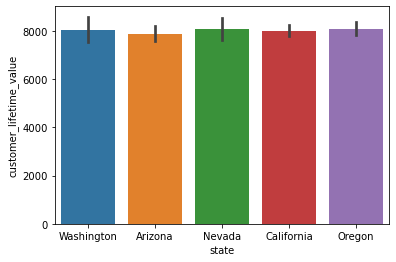

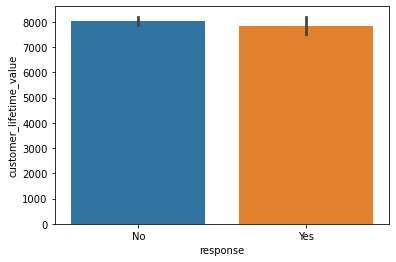

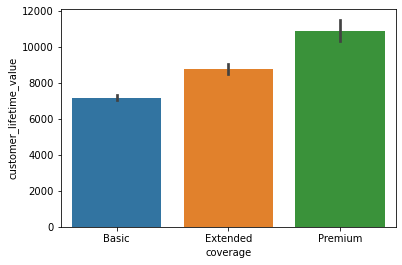

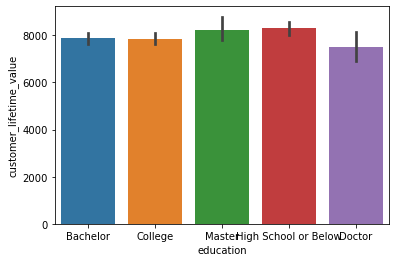

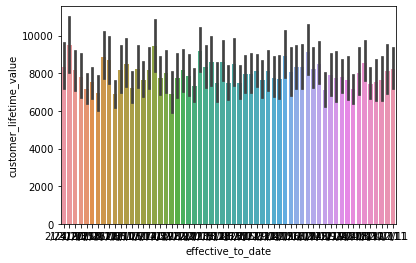

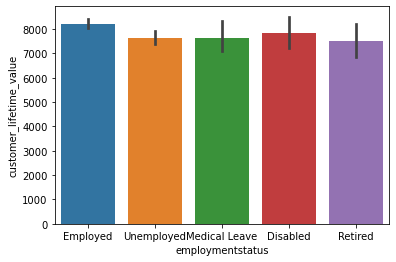

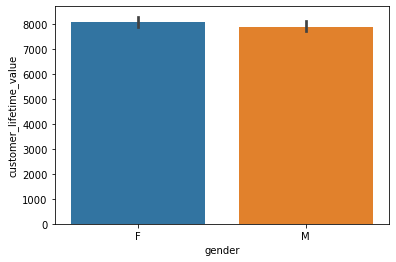

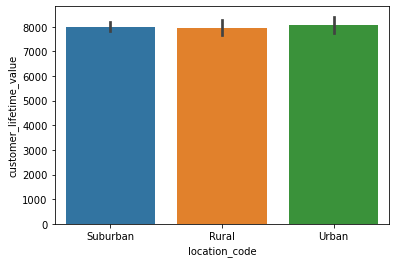

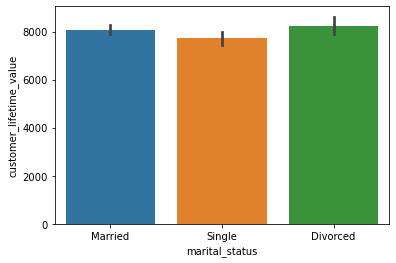

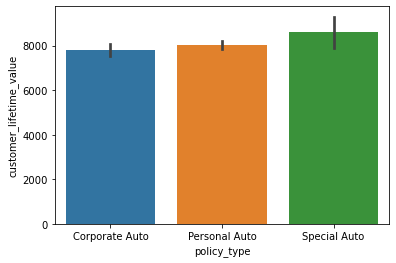

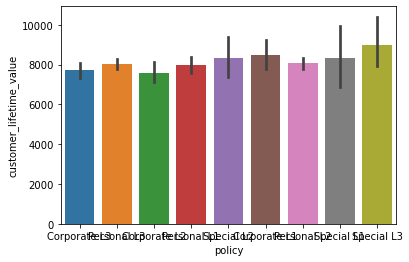

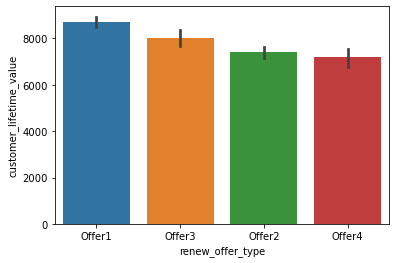

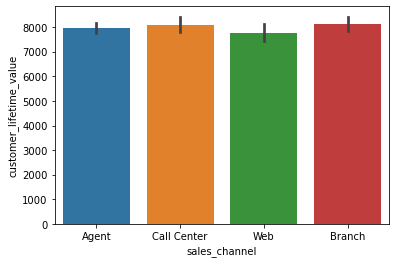

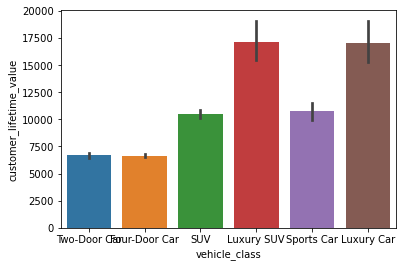

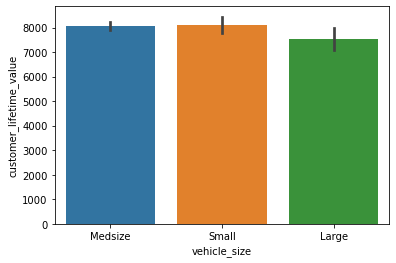

In [11]:

for col in categorical_df.columns:
    sns.barplot(x = categorical_df[col], y = customer_df['customer_lifetime_value'])
    plt.show()

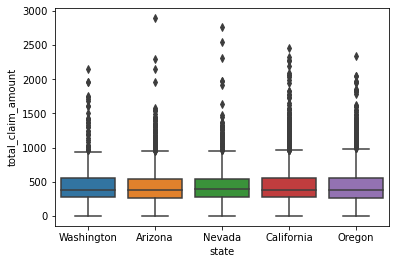

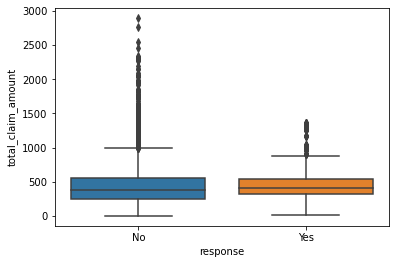

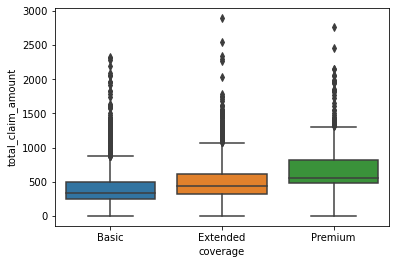

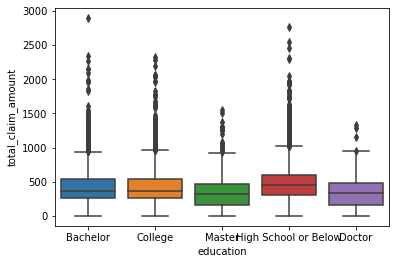

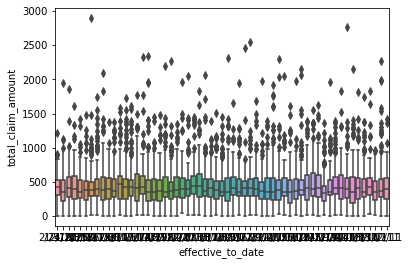

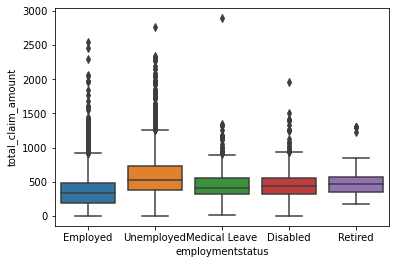

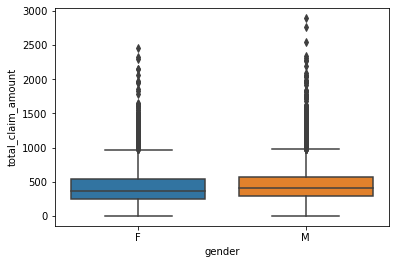

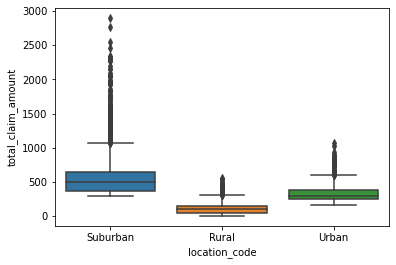

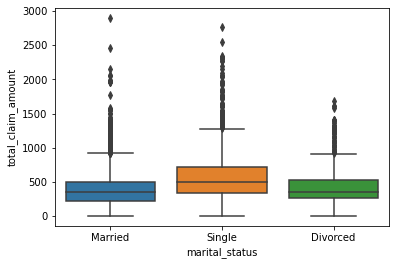

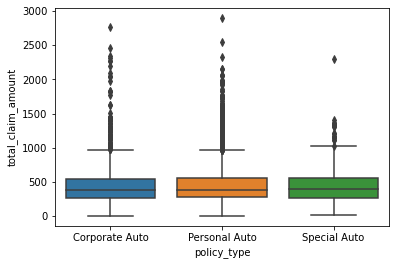

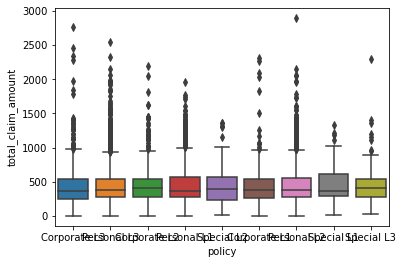

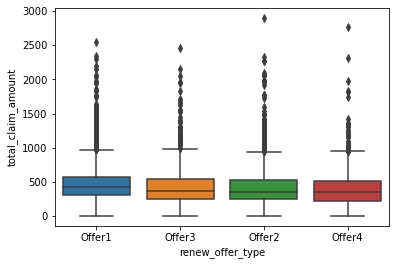

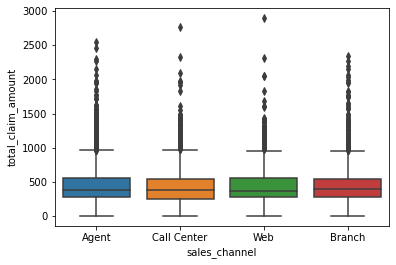

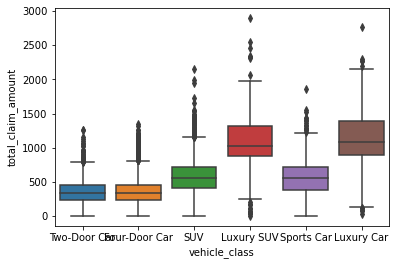

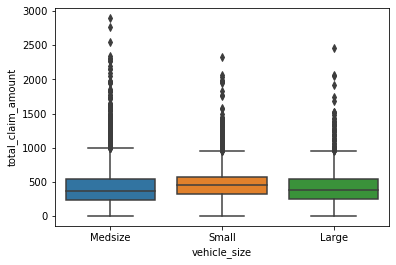

In [12]:
for col in categorical_df.columns:
    sns.boxplot(x = categorical_df[col], y = customer_df['total_claim_amount'])
    plt.show()

### Ex.6: For the categorical data, check if there is any data cleaning that need to perform. Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.

In [13]:
categorical_df.columns

Index(['state', 'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [14]:
display(customer_df.state.value_counts())
display(customer_df.response.value_counts())
display(customer_df.coverage.value_counts())
display(customer_df.education.value_counts())
display(customer_df.employmentstatus.value_counts())
display(customer_df.gender.value_counts())
display(customer_df.location_code.value_counts())
display(customer_df.marital_status.value_counts())
display(customer_df.policy_type.value_counts())
display(customer_df.policy.value_counts())
display(customer_df.renew_offer_type.value_counts())
display(customer_df.sales_channel.value_counts())
display(customer_df.vehicle_class.value_counts())
display(customer_df.vehicle_size.value_counts())


California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

No     7826
Yes    1308
Name: response, dtype: int64

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

F    4658
M    4476
Name: gender, dtype: int64

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In case of classification problem, the data needs cleaning as most of classes are imbalance and it needs to be resampled by using SMOTE, Tomeklink , or random over or undersampling techniques.

### There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

If we look at correlation coefficients, it seems that very few variables has any siginificant relationship with our target variable (Total_claim amount), So it is best to remove them. But I would prefer to apply model by using everything and then while improvining model I will delete or add something. 

In [15]:
# in order plot time I have created new copy of data, as i deleted time variable from previous dataset. 
data = pd.read_csv(r"C:\Users\s_sad\lab-cleaning-numerical-data-master\files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv")

In [16]:
# replacing spaces with underscore
data.columns = data.columns.map(lambda x:x.replace("-","_").replace(" ","_"))
data.columns

Index(['Customer', 'State', 'Customer_Lifetime_Value', 'Response', 'Coverage',
       'Education', 'Effective_To_Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location_Code', 'Marital_Status', 'Monthly_Premium_Auto',
       'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
       'Number_of_Open_Complaints', 'Number_of_Policies', 'Policy_Type',
       'Policy', 'Renew_Offer_Type', 'Sales_Channel', 'Total_Claim_Amount',
       'Vehicle_Class', 'Vehicle_Size'],
      dtype='object')

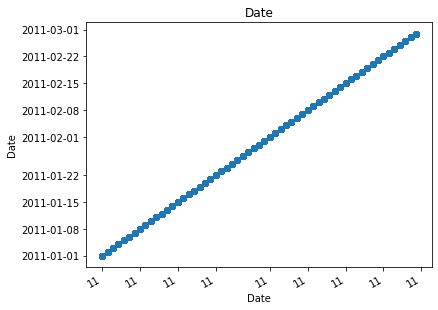

In [17]:
from matplotlib import dates as mpl_dates

data['Effective_To_Date'] = pd.to_datetime(data['Effective_To_Date'])
data.sort_values('Effective_To_Date', inplace=True)
date = data['Effective_To_Date']
plt.plot_date(date,date, linestyle='solid')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%y')

plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.title('Date')
plt.xlabel('Date')
plt.ylabel('Date')
plt.show()

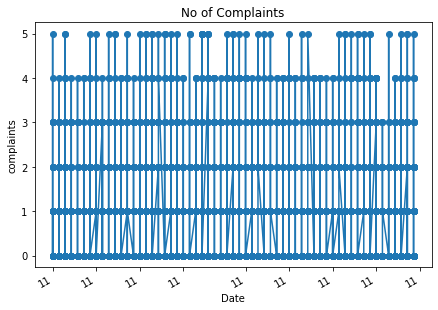

In [18]:
from matplotlib import dates as mpl_dates

data['Effective_To_Date'] = pd.to_datetime(data['Effective_To_Date'])
data.sort_values('Effective_To_Date', inplace=True)
date = data['Effective_To_Date']
Complaints = data['Number_of_Open_Complaints']
plt.plot_date(date,Complaints, linestyle='solid')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%y')

plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.title('No of Complaints')
plt.xlabel('Date')
plt.ylabel('complaints')
plt.show()

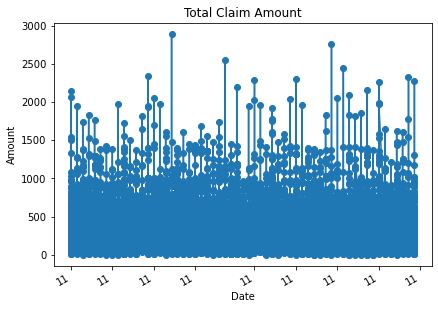

In [19]:
from matplotlib import dates as mpl_dates

data['Effective_To_Date'] = pd.to_datetime(data['Effective_To_Date'])
data.sort_values('Effective_To_Date', inplace=True)
date = data['Effective_To_Date']
Amount = data['Total_Claim_Amount']
plt.plot_date(date,Amount, linestyle='solid')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%y')

plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.title('Total Claim Amount')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.show()

plotting Date variable against few variables is not providing any pattern of movement. Just random points. So it is not providing any useful information. We can't say that total_claim_amount is increasing or decreasing over the months. 

In [20]:
#Starting here

### We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

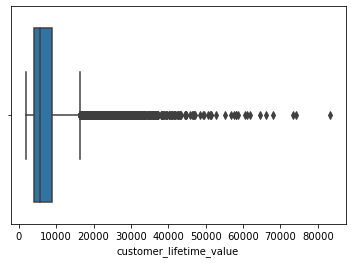

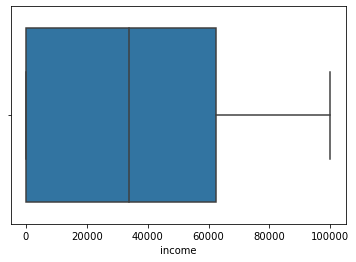

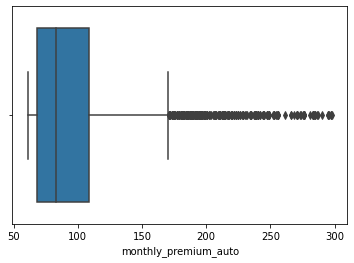

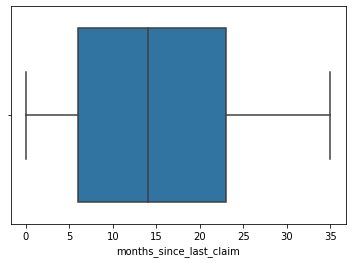

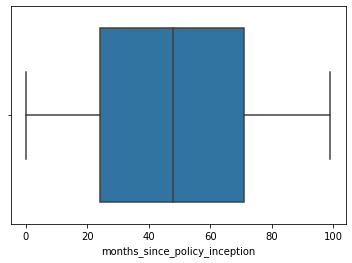

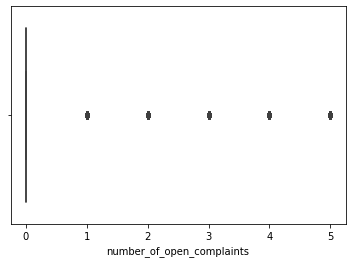

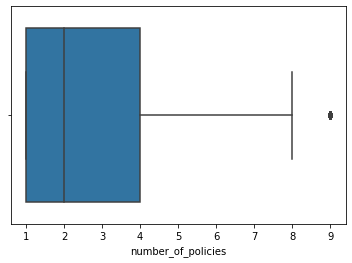

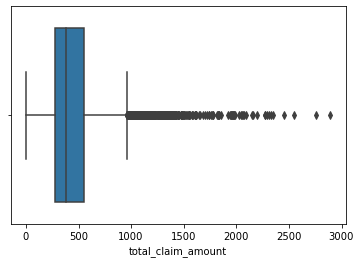

In [21]:
# checking outliers in numerical data
for col in numericals_df.columns:
    sns.boxplot(x = numericals_df[col])
    plt.show()

There are too many outliers, removing them will result in loss of information, therefore we will only remove outliers from number of policies where the outliers are not too much.

In [22]:
#defining function to remove outliers through IQR
def remove_outlier_IQR(customer_df,column):
    Q1=customer_df.quantile(0.25)
    Q3=customer_df.quantile(0.75)
    IQR=Q3-Q1
    df_final=customer_df[~((customer_df<(Q1-1.5*IQR)) | (customer_df>(Q3+1.5*IQR)))]
    return df_final

In [23]:

filtered_df = remove_outlier_IQR(customer_df, ['number_of_policies', 'monthly_premium_auto', 'customer_lifetime_value', 'total_claim_amount'])


C:\Users\s_sad\AppData\Local\Temp\ipykernel_328\2657479980.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_final=customer_df[~((customer_df<(Q1-1.5*IQR)) | (customer_df>(Q3+1.5*IQR)))]


In [24]:
# here we can transform categorical variable i.e. education into 3 categories
customer_df.education.value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

In [25]:
def clean_education_col(x): #defining funcation 
    if x in ['College', 'High School or Below']:
        return 'Undergraduate'
    elif x in ['Bachelor', 'Master']:
        return 'Graduate'
    else:
        return x
categorical_df['education']= categorical_df['education'].apply(clean_education_col)

In [26]:
customer_df.education.value_counts() # checking after redefining

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

### Normalize the continuous variables. You can use any one method you want. 

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(numericals_df)
print(scaled_df.mean(axis=0))
print(scaled_df.std(axis =0))

[ 4.00623504e-17  7.46793329e-17 -1.48775233e-16  4.47298087e-17
  1.00350354e-16  7.62351523e-17 -1.36134201e-17 -3.65617567e-17]
[1. 1. 1. 1. 1. 1. 1. 1.]


### Encode the categorical variables

In [29]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
categorical_cols = ['state', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'] 

array_hot_encoded = ohe.fit_transform(customer_df[categorical_cols])

#Convert it to df
data_hot_encoded = pd.DataFrame(array_hot_encoded)


### Ordinal Coding 

In [30]:
customer_df["coverage"] = customer_df["coverage"].map({"Basic": 0, "Extended": 1, "Premium": 2})
customer_df["employment_status"] = customer_df["employmentstatus"].map({"Employed": 0, "Unemployed": 1, "Medical Leave": 3, "Disabled" : 4, "Retired": 5})
customer_df["marital_status"] = customer_df["marital_status"].map({"Married": 0, "Single": 1, "Divorced": 2})
customer_df["vehicle_size"] = customer_df["vehicle_size"].map({"Medsize": 0, "Small": 1, "Large": 2})

In [31]:
customer_df.vehicle_size.value_counts()

0    6424
1    1764
2     946
Name: vehicle_size, dtype: int64

### The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [32]:
customer_df["effective_to_date"] = pd.to_datetime(customer_df["effective_to_date"])

In [33]:
customer_df['year'] = customer_df['effective_to_date'].dt.year
customer_df['month'] = customer_df['effective_to_date'].dt.month
